In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Vector Representations

The introductory example in the previous section showed two approaches to representing text data, both relying on a mapping of language to 
a numerical representation. This representation is essential, because it allows us to apply mathematical operations to the text data.

In this section, we will explore the concept of vector representations in more detail. We will discuss the different types of vector representations,

- Vectors
- Text preprocessing
- Count vectorization: term frequency - inverse document frequency (TF-IDF)
- Word embeddings: word2vec, GloVe


## Vectors

Vectors are the fundamental building blocks of machine learning. They are mathematical objects that have both magnitude and direction. In the context of text data, vectors are used to represent characters, sub-words, words, sentences, and documents.

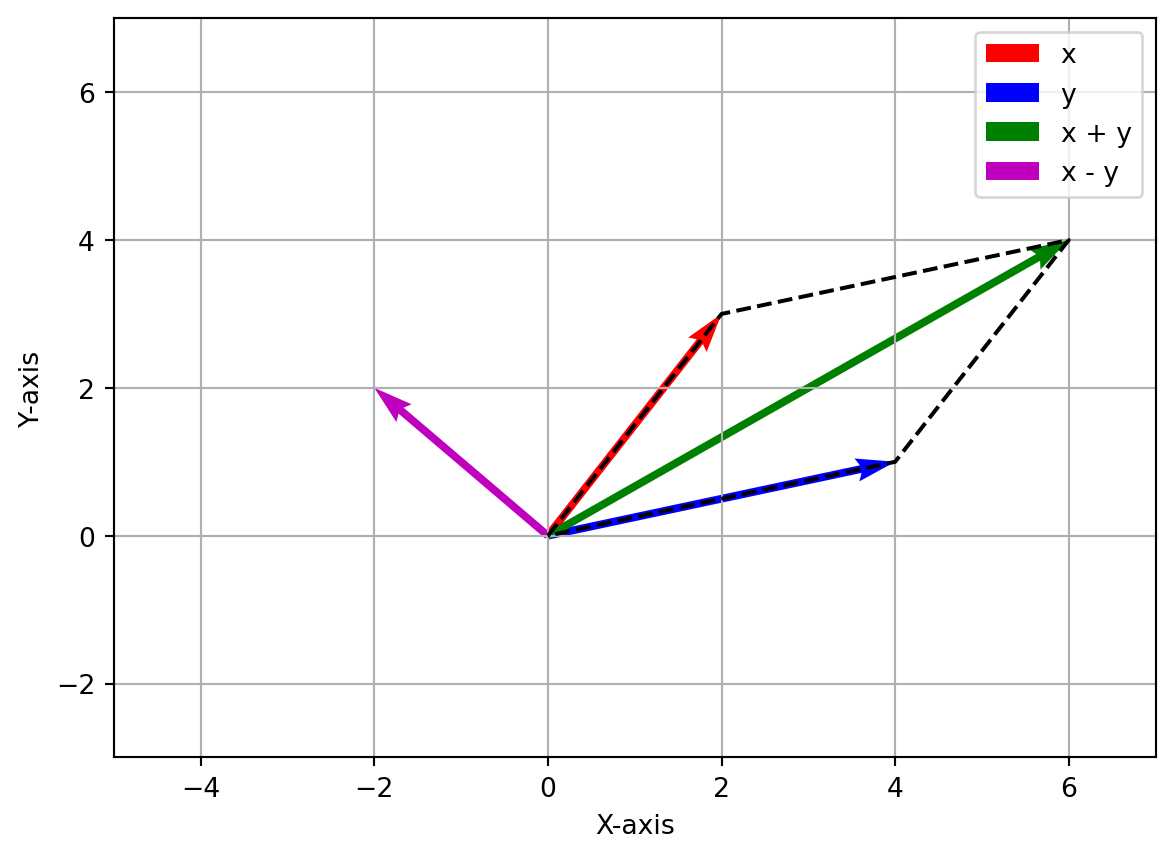

In [2]:
# Define the vectors
vector_1 = np.array([2, 3])
vector_2 = np.array([4, 1])

# Calculate the sum and difference of the vectors
vector_sum = vector_1 + vector_2
vector_diff = vector_1 - vector_2

# Calculate the vertices of the parallelogram
origin = np.array([0, 0])
vertex_1 = vector_1
vertex_2 = vector_2
vertex_3 = vector_1 + vector_2

# Plot the vectors
plt.figure()
plt.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
plt.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b', label='y')

# Plot the parallelogram
parallelogram = np.array([origin, vertex_1, vertex_3, vertex_2, origin])
plt.plot(parallelogram[:, 0], parallelogram[:, 1], 'k--')

# Plot the sum and difference vectors
plt.quiver(0, 0, vector_sum[0], vector_sum[1], angles='xy', scale_units='xy', scale=1, color='g', label='x + y')
plt.quiver(0, 0, vector_diff[0], vector_diff[1], angles='xy', scale_units='xy', scale=1, color='m', label='x - y')

# Set the limits of the plot
plt.xlim(-5, 7)
plt.ylim(-3, 7)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

:::{#def-dot-product}
## Dot product

The dot product of two vectors is a scalar value that is calculated by multiplying the corresponding elements of the two vectors and summing the results.

The dot product of two vectors, $x$ and $y$, is calculated as follows:

$$
x = \begin{pmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{pmatrix}, \quad y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}
$$

$$
x \cdot y = x_1 \cdot y_1 + x_2 \cdot y_2 + \ldots + x_n \cdot y_n = \sum_{i=1}^{n} x_i \cdot y_i
$$

You can obtain the same result by matrix multiplication:

$$
x \cdot y = x^T \cdot y
$$

Note that the dot product is commutative, meaning that $x \cdot y = y \cdot x$ and that it is defined only for vectors of the _same length_.
:::

The dot product is fundamental, because it allows us to measure the similarity between two vectors. To see this, consider the angle between two vectors. The cosine theorem states that the cosine of the angle between two vectors is equal to the dot product of the two vectors divided by the product of their magnitudes:

:::{#def-cosine-similarity}
## Cosine similarity

Let the angle between to vectors, $x$ and $y$, be $\theta$. The cosine of the angle, $\cos(\theta)$, is calculated as follows:

$$
\cos(\theta)= \frac{x \cdot y}{\|x\| \cdot \|y\|}
$$

where $\|x\|$ and $\|y\|$ are the magnitudes (lengths) of vectors $x$ and $y$, respectively.

The magnitudes are calculated as follows:

$$
\|x\| = \sqrt{x_1^2 + x_2^2 + \ldots + x_n^2} = \sqrt{\sum_{i=1}^{n} x_i^2}
$$

:::

Just as the correlation between two vectors, the cosine similarity ranges between -1 and 1. In fact, if the vectors are centered (i.e., the mean of each vector is zero), the cosine similarity is equal to the correlation.

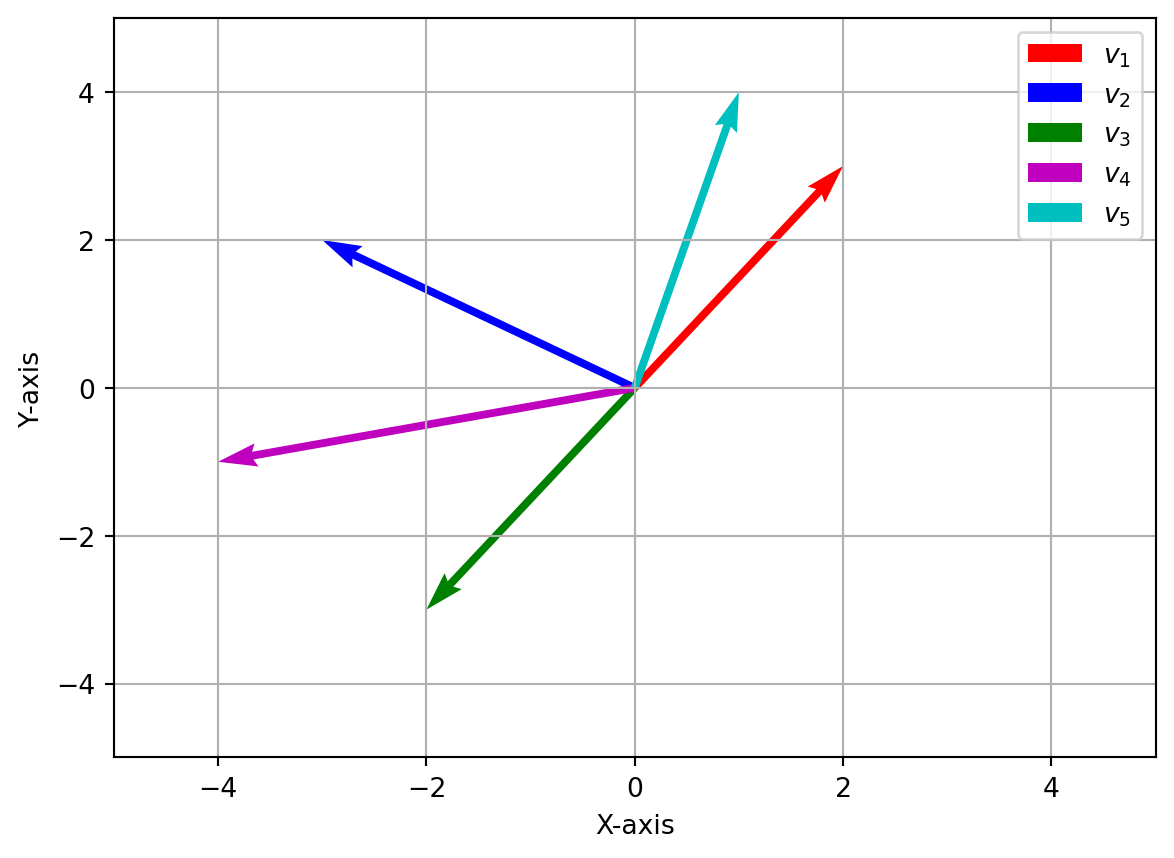

In [3]:
# Define the vectors
orthogonal_vector = np.array([-3, 2])
opposite_vector_1 = -vector_1
opposite_vector_2 = -vector_2
other_vector = np.array([1, 4])

# Plot the vectors
plt.figure()
plt.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='$v_1$')
plt.quiver(0, 0, orthogonal_vector[0], orthogonal_vector[1], angles='xy', scale_units='xy', scale=1, color='b', label='$v_2$')
plt.quiver(0, 0, opposite_vector_1[0], opposite_vector_1[1], angles='xy', scale_units='xy', scale=1, color='g', label='$v_3$')
plt.quiver(0, 0, opposite_vector_2[0], opposite_vector_2[1], angles='xy', scale_units='xy', scale=1, color='m', label='$v_4$')
plt.quiver(0, 0, other_vector[0], other_vector[1], angles='xy', scale_units='xy', scale=1, color='c', label='$v_5$')

# Set the limits of the plot
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

## Language Structure

The structure of language is hierarchical. At the lowest level, we have characters, which are combined to form words. Words are combined to form sentences, and sentences are combined to form documents.

- A **character** is the smallest unit of language. It can be a letter, a number, a punctuation mark, or a symbol.
- A **word** is a sequence of characters that has a meaning.
- A **sentence** is a sequence of words and punctuation that conveys a complete thought.
- A **document** is a sequence of sentences that conveys a complete idea.

More generally, we can think of language as a sequence of **tokens**. A token can be a character, a word, a sub-word, or a sentence. In this context, the term **tokenization** refers to the process of breaking up a sequence of text into tokens.

A **corpus** is a collection of documents. The documents in a corpus can be of different types, such as books, articles, emails, or tweets.

## N-grams

An **n-gram** is a contiguous sequence of n items from a given sequence of text. The items can be characters, words, or sub-words. 

For example, consider the sentence "Alice was beginning to get very tired of sitting." and take the words as tokens. The uni-grams (1-grams) are:

["Alice", "was", "beginning", "to", "get", "very", "tired", "of", "sitting"]

The bi-grams (2-grams) are:

["Alice was", "was beginning", "beginning to", "to get", "get very", "very tired", "tired of", "of sitting"]

## Bag of Words

The order of characters, words and sentences is essential for conveying meaning.

- Cat toy vs toy cat

If you reshuffle the words in a sentence, most likely the result will not make sense or will have a different meaning. Nevertheless, approaches to text analysis that ignore the order of words are very common.

In [4]:
txt = """
Either the well was very deep, or she fell very slowly, 
for she had plenty of time as she went down to look about her and to wonder
what was going to happen next.
""".replace("\n", "")

txt_list = txt.split(" ")
np.random.shuffle(txt_list)
" ".join(txt_list)

'look was had going deep, well she she to wonderwhat down Either or was she as about of very went plenty time to happen for next. to and slowly, fell very her the'

## Count Vectorization

A very simple way to represent text data is to simply count the number of times each word appears in a document. This approach is called **count vectorization**.

Consider a very small example of three documents.

$$
\begin{align*}
\text{doc1} & = [\text{boy}, \text{mouse}] \\
\text{doc2} & = [\text{mouse}] \\
\text{doc3} & = [\text{zoo}, \text{boy}]\\
\text{doc4} & = [\text{zoo}, \text{boy}, \text{zoo}]
\end{align*}
$$

The set of unique words in this corpus is \["boy", "mouse", "zoo"\]. We call this set the **vocabulary** of the corpus. The **vocabulary size** is the number of words. There is a simple way to 
map each word to a vector space. We can simply assign a unique index to each word in the vocabulary and assign a vector to each word
with all zeros except for the index of the word, which is set to 1. This is called a **one-hot encoding**.

$$
\text{boy} \to
\left(
    \begin{array}{c}
        1 \\
        0\\
        0
    \end{array}
\right)
\quad
\text{mouse} \to
\left(
    \begin{array}{c}
        0 \\
        1\\
        0
    \end{array}
\right)
\quad
\text{zoo} \to
\left(
    \begin{array}{c}
        0 \\
        0\\
        1
    \end{array}
\right)
$$

A simple way to represent a document is to count the number of times each word appears in the document. This is called a **count vector**. It corresponds to the sum of the one-hot encodings of the words in the document.

$$
\begin{align*}
\text{doc1} & = \left(
    \begin{array}{c}
        1 \\
        1\\
        0
    \end{array}
\right)
\text{doc2} & = \left(
    \begin{array}{c}
        0 \\
        1\\
        0
    \end{array}
\right)
\text{doc3} & = \left(
    \begin{array}{c}
        1 \\
        0\\
        1
    \end{array}
\right)
\text{doc4} & = \left(
    \begin{array}{c}
        1 \\
        0\\
        2
    \end{array}
\right)
\end{align*}
$$


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

vectorizer = CountVectorizer()

docs = ["boy mouse", "mouse", "zoo boy", "zoo boy zoo"]

term_matrix = vectorizer.fit_transform(docs)
print(vectorizer.get_feature_names_out())


dt = pd.DataFrame(
    term_matrix.toarray(), 
    columns=vectorizer.get_feature_names_out(), 
    index=[f"doc {i + 1}" for i in range(len(docs))]
)

dt["text"] = docs
dt


['boy' 'mouse' 'zoo']


,boy,mouse,zoo,text
doc 1,1,1,0,boy mouse
doc 2,0,1,0,mouse
doc 3,1,0,1,zoo boy
doc 4,1,0,2,zoo boy zoo


You can view the term matrix as a representation of the documents in a vector space (of dimension equal to the vocabulary size) and you can also view the words as vectors in the space of documents.

In [6]:
# You can check the vocabulary of the vectorizer

vectorizer.vocabulary_

{'boy': 0, 'mouse': 1, 'zoo': 2}

In [7]:
# You can also check the extracted features

# Check the extracted features
vectorizer.get_feature_names_out()

array(['boy', 'mouse', 'zoo'], dtype=object)

:::{#exr-count-vectorization}
## Count Vectorization using Scipy

Create the term matrix for the following documents using `numpy` and `scipy`.

:::

In [8]:
from scipy.sparse import csr_matrix

txt_list = [
    "There are no mice in the air",
    "but you might catch a bat",
    "very like mice you know",
    "But do cats eat bats",
]

vocab = {}

for txt in txt_list:
    for word in txt.lower().split(" "):
        if word not in vocab:
            vocab[word] = len(vocab)

print(vocab)

rows, cols, data = [], [], []

# Create a document-term matrix
rows, cols, data = [], [], []
for row, document in enumerate(txt_list):
    word_count = {}
    for word in document.lower().split():
        col = vocab[word]
        if col not in word_count:
            word_count[col] = 0
        word_count[col] += 1
    for col, count in word_count.items():
        rows.append(row)
        cols.append(col)
        data.append(count)

# Create the matrix
term_matrix = csr_matrix((data, (rows, cols)), shape=(len(txt_list), len(vocab)))

# Print the resulting matrix and feature names
print("Document-Term Matrix:\n", term_matrix.toarray())
print("Feature Names:\n", list(vocab.keys()))

{'there': 0, 'are': 1, 'no': 2, 'mice': 3, 'in': 4, 'the': 5, 'air': 6, 'but': 7, 'you': 8, 'might': 9, 'catch': 10, 'a': 11, 'bat': 12, 'very': 13, 'like': 14, 'know': 15, 'do': 16, 'cats': 17, 'eat': 18, 'bats': 19}
Document-Term Matrix:
 [[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1]]
Feature Names:
 ['there', 'are', 'no', 'mice', 'in', 'the', 'air', 'but', 'you', 'might', 'catch', 'a', 'bat', 'very', 'like', 'know', 'do', 'cats', 'eat', 'bats']
